In [1]:
#!cp drive/MyDrive/data.csv data.csv

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('data.csv')

In [4]:
data_chosen = data[['LotArea', 'GarageArea', 'LotFrontage', 'SalePrice']]

data_chosen = data_chosen.fillna(0)

In [5]:
data_chosen

,LotArea,GarageArea,LotFrontage,SalePrice
0,5925,672,50.0,89471
1,9158,474,76.0,225000
2,12400,297,66.0,155000
3,8520,720,71.0,166000
4,17217,0,90.0,84500
...,...,...,...,...
1455,3180,480,30.0,151000
1456,5000,420,50.0,159000
1457,8640,552,72.0,229456
1458,12182,532,95.0,220000


In [6]:
data_array = np.array(data_chosen)

## Part 2

### Standartization

In [7]:
data_array.shape

(1460, 4)

In [8]:
means = np.mean(data_array, axis=0)
mins = np.min(data_array, axis=0)
maxs = np.max(data_array, axis=0)
stds = np.std(data_array, axis=0)

In [9]:
means.shape, mins.shape, maxs.shape, stds.shape

((4,), (4,), (4,), (4,))

In [10]:
z_data_array = (data_array - means) / stds
range_data_array = (data_array - means) / (maxs - mins)
rank_data_array = (data_array - mins) / (maxs - mins)

In [11]:
range_data_array.shape

(1460, 4)

### Вычисление data scatter, SVD

In [12]:
#No preprocessing
no_preprocess_ds = np.sum(data_array ** 2)
no_preprocess_z, no_preprocess_mu, no_preprocess_c = np.linalg.svd(data_array, full_matrices=True)

no_preprocess_z = -no_preprocess_z
no_preprocess_c = -no_preprocess_c

In [13]:
#Z rescaling
z_ds = np.sum(z_data_array ** 2)
z_z, z_mu, z_c = np.linalg.svd(z_data_array, full_matrices=True)

z_z = -z_z
z_c = -z_c

In [14]:
#Range rescaling
range_ds = np.sum(range_data_array ** 2)
range_z, range_mu, range_c = np.linalg.svd(range_data_array, full_matrices=True)

range_z = -range_z
range_c = -range_c

In [15]:
#Rank rescaling
rank_ds = np.sum(rank_data_array ** 2)
rank_z, rank_mu, rank_c = np.linalg.svd(rank_data_array, full_matrices=True)

rank_z = -rank_z
rank_c = -rank_c

### Contributions

**Natural contributions**

In [16]:
print(f'Z standartization: {z_mu ** 2}')
print(f'Range standartization: {range_mu ** 2}')
print(f'Rank standartization: {rank_mu ** 2}')
print(f'No standartization: {no_preprocess_mu ** 2}')

Z standartization: [2721.23635473 1317.52039218 1260.69702344  540.54622965]
Range standartization: [44.0737501  16.494224    8.52518867  2.90406973]
Rank standartization: [317.62555709  17.55675833   8.53650423   2.94324016]
No standartization: [5.71648734e+13 1.39643388e+11 4.72807632e+07 1.92562095e+06]


**Percent contributions**

In [17]:
print(f'Z standartization: {z_mu ** 2 / z_ds}')
print(f'Range standartization: {range_mu ** 2 / range_ds}')
print(f'Rank standartization: {rank_mu ** 2 / rank_ds}')
print(f'No standartization: {no_preprocess_mu ** 2 / no_preprocess_ds}')

Z standartization: [0.46596513 0.22560281 0.21587278 0.09255929]
Range standartization: [0.61215895 0.22909525 0.11840995 0.04033585]
Rank standartization: [0.91623974 0.05064517 0.02462486 0.00849023]
No standartization: [9.97562278e-01 2.43686321e-03 8.25078463e-07 3.36032726e-08]


## Part 3

In [18]:
#Rank rescaling
rank_ds = np.sum(rank_data_array ** 2)
rank_z, rank_mu, rank_c = np.linalg.svd(rank_data_array, full_matrices=True)

#rank_z = -rank_z
#rank_c = -rank_c

In [19]:
argmax_ind = np.argmax(rank_mu)

In [20]:
rank_z_vec = rank_z[:, argmax_ind]
max_mu = rank_mu[argmax_ind]
rank_c_vec = rank_c[argmax_ind, :]

In [21]:
alpha = 1.0/np.sum(rank_c_vec)
loading = rank_c_vec * alpha

In [22]:
loading

array([0.05440331, 0.44268863, 0.23282326, 0.2700848 ])

In [23]:
z_vec = np.matmul(rank_data_array, loading)

In [24]:
z_vec

array([0.2686292 , 0.27780947, 0.18968279, ..., 0.30072466, 0.30894329,
       0.16425285])

Интерпретация: все 4 фичи интерпретируются в самом начале, LotArea меньше всего, GarageArea больше всего

## Part 4

In [25]:
import matplotlib.pyplot as plt

In [30]:
indices = np.where(data_array[:, -1] >= 360000)[0] 
print(indices)

[  28   32   59   76   86  102  124  133  140  200  207  230  253  270
  286  307  320  373  419  422  434  479  509  519  521  527  546  579
  587  606  658  674  678  722  727  733  775  805  850  872  883  936
  945  956  959 1128 1237 1240 1269 1291 1326 1381]


In [31]:
z_r0 = range_z[:, 0] * np.sqrt(range_mu[0])
z_r1 = range_z[:, 1] * np.sqrt(range_mu[1])

Text(0.5, 1.0, 'PCA of Range Standartized Data')

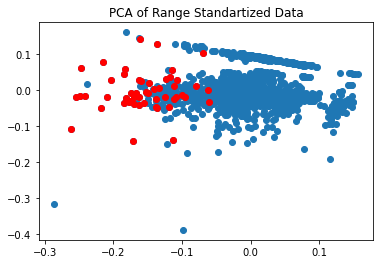

In [32]:
plt.scatter(z_r0, z_r1)
plt.scatter(z_r0[indices], z_r1[indices], c='r')
plt.title('PCA of Range Standartized Data')

In [33]:
z_z0 = z_z[:, 0] * np.sqrt(z_mu[0])
z_z1 = z_z[:, 1] * np.sqrt(z_mu[1])

Text(0.5, 1.0, 'PCA of Z-Scoring Standartized Data')

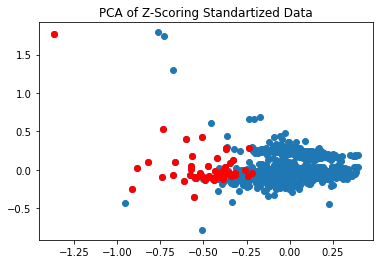

In [34]:
plt.scatter(z_z0, z_z1)
plt.scatter(z_z0[indices], z_z1[indices], c='r')
plt.title('PCA of Z-Scoring Standartized Data')

## Part 5

In [114]:
def get_next_comp(Y, B):
    eig_vals, eig_vecs = np.linalg.eig(B)
    
    max_val_ind = np.argmax(eig_vals)
    eig_val = eig_vals[max_val_ind]
    eig_vec = eig_vecs[:, max_val_ind]

    assert np.allclose(B @ eig_vec, eig_val * eig_vec)
    
    Z = Y @ eig_vec / (Y.shape[0] * eig_val)
    
    return Z, eig_vec, eig_val
    

def get_2_components(X, n_comps, stand):
    Y = z_data_array - np.mean(z_data_array, axis=0, keepdims=True)
    B = Y.T @ Y / Y.shape[0]
    comps = []
    
    for i in range(n_comps):
        comp, eig_vec, eig_val = get_next_comp(Y, B)
        comps.append(comp)
        B = B - eig_val * eig_vec.reshape(-1, 1) @ eig_vec.reshape(1, -1)
        
    return comps

In [117]:
comp_1, comp_2 = get_2_components(z_data_array, 2)

Text(0.5, 1.0, 'First to principal components')

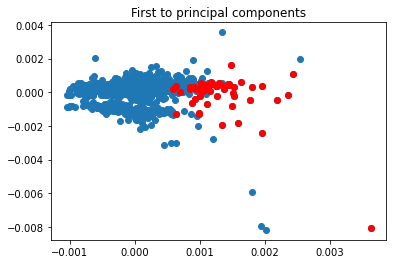

In [120]:
plt.scatter(comp_1, comp_2)
plt.scatter(comp_1[indices], comp_2[indices], c='r')
plt.title('First two principal component of zscored data')

In [125]:
comp_1, comp_2 = get_2_components(data_array, 2)

Text(0.5, 1.0, 'First two principal component of original data')

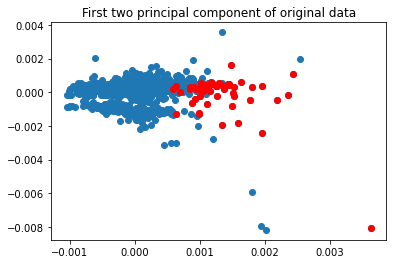

In [127]:
plt.scatter(comp_1, comp_2)
plt.scatter(comp_1[indices], comp_2[indices], c='r')
plt.title('First two principal component of original data')